## 직원 이직 데이터 분석

### 데이터 전처리

* 직원 이직으로 이어지는 요인을 파악




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [ ]:
train = pd.read_csv('/content/HR Employee Attrition.csv')

In [ ]:
# 모든 행을 출력
pd.set_option('display.max_columns', None)

In [ ]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터 세트 형상: (1470, 35)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,Age,int64,0,43,41,49,37
1,Attrition,object,0,2,Yes,No,Yes
2,BusinessTravel,object,0,3,Travel_Rarely,Travel_Frequently,Travel_Rarely
3,DailyRate,int64,0,886,1102,279,1373
4,Department,object,0,3,Sales,Research & Development,Research & Development
5,DistanceFromHome,int64,0,29,1,8,2
6,Education,int64,0,5,2,1,2
7,EducationField,object,0,6,Life Sciences,Life Sciences,Other
8,EmployeeCount,int64,0,1,1,1,1
9,EmployeeNumber,int64,0,1470,1,2,4


> 데이터 삭제 : 피처 고유값 개수 1개

* EmployeeCount

* EmployeeNumber

* Over18

* StandardHours

> 타겟 : Attrition

* 범주형 / 수치형 피처별 분석 진행

In [ ]:
train['Attrition'] = train['Attrition'].map({'Yes' : 1, 'No' : 0})

### 범주형 피처


* BusinessTravel
* Department
* EducationField
* Gender
* JobRole
* OverTime 

In [ ]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬


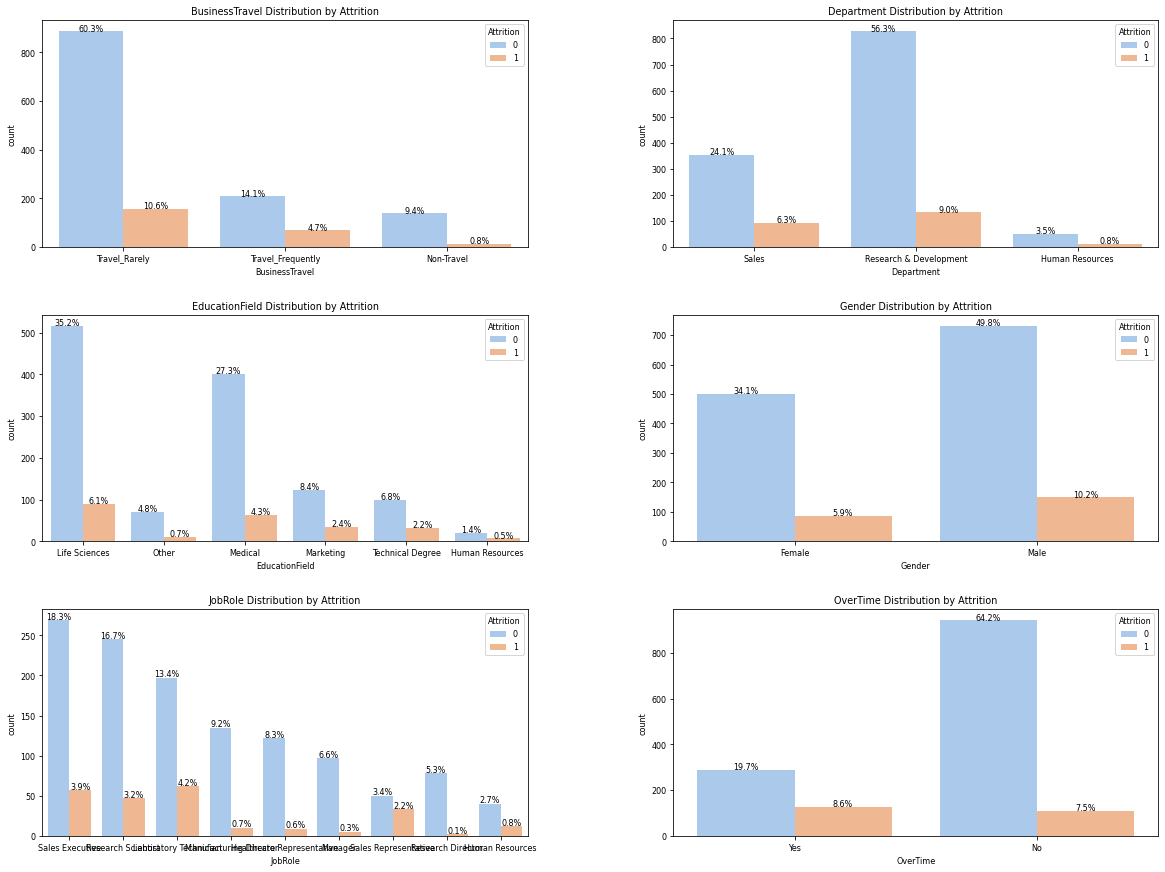

In [ ]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=8)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(20, 15))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.3, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime' ] # 피처 목록

for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='Attrition',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Attrition') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시

In [ ]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['Attrition'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [ ]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',                  # 포인트플롯 색상
                        legend=False)                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Attrition 1 Ratio(%)')

In [ ]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(20, 15)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
       
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

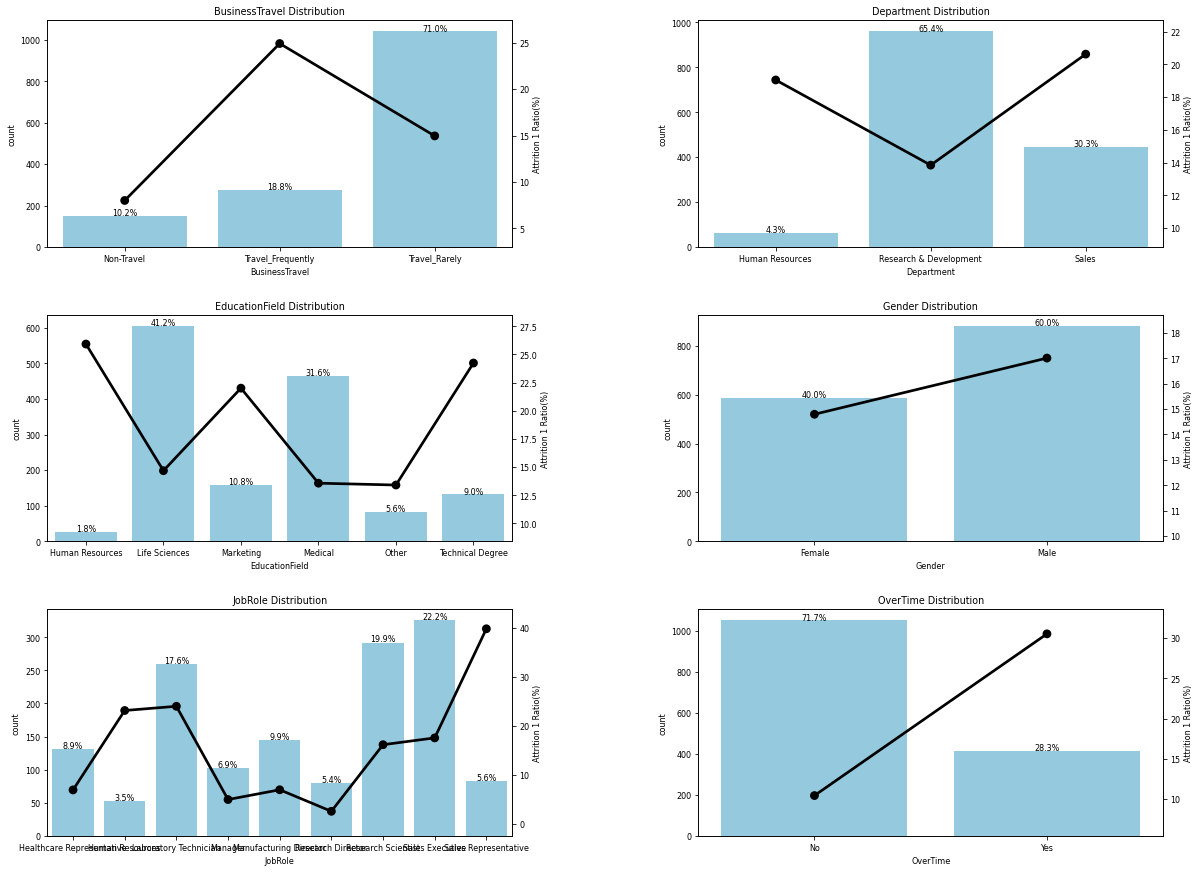

In [ ]:
nom_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime' ] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

> 고유값 개수가 적어서 One-hot encoding 진행

> Label encoding : 고유값이 많아 피처의 개수가 많아 One-hot encoding으로 진행 시 학습속도가 느려질 가능성이 있을 때 사용

> 간단하게 문자열 값을 숫자형 카테고리 값으로 변환하지만 일괄적으로 숫자 값으로 변환이 되면서 가중치로 인식하여 값에 왜곡이 발생

>  몇몇 ML알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생하여 선형 회귀와 같은 ML알고리즘에는 적용하지 않음 

> 트리 계열(결정트리, 랜덤 포레스트, GBM, XGBOOST, LightGBM)의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 Label encoding도 별 문제 없음

In [ ]:
 # train = pd.get_dummies(data = train, columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime' ])
 # train.head()

### 순서형 피처

* 순서형 자료에서는 Ordinal Encoding 사용

* Education

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'


* EnvironmentSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

* JobInvolvement

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

* JobSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

* PerformanceRating

1 'Low'

2 'Good'

3 'Excellent'

4 'Outstanding'

* RelationshipSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

* WorkLifeBalance

1 'Bad'

2 'Good'

3 'Better'

4 'Best'

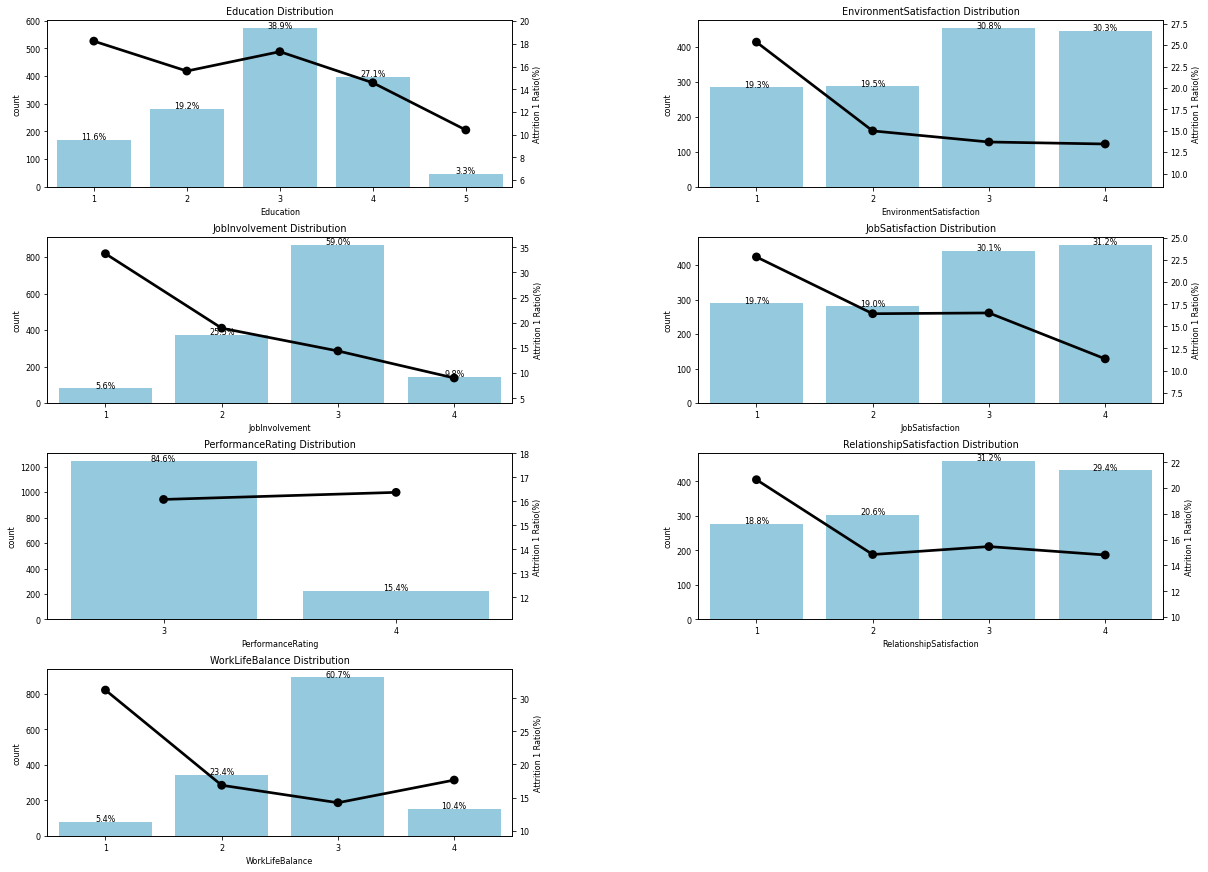

In [ ]:
# 순서형 피처
list_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction' ,'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance' ] # 순서형 피처
plot_cat_dist_with_true_ratio(train, list_features, num_rows=4, num_cols=2)

> PerformanceRating : 1, 2, 3, 4 중 3, 4에 값이 몰려 있으며, 비율 차이가 거의 없기 때문 피처 제거

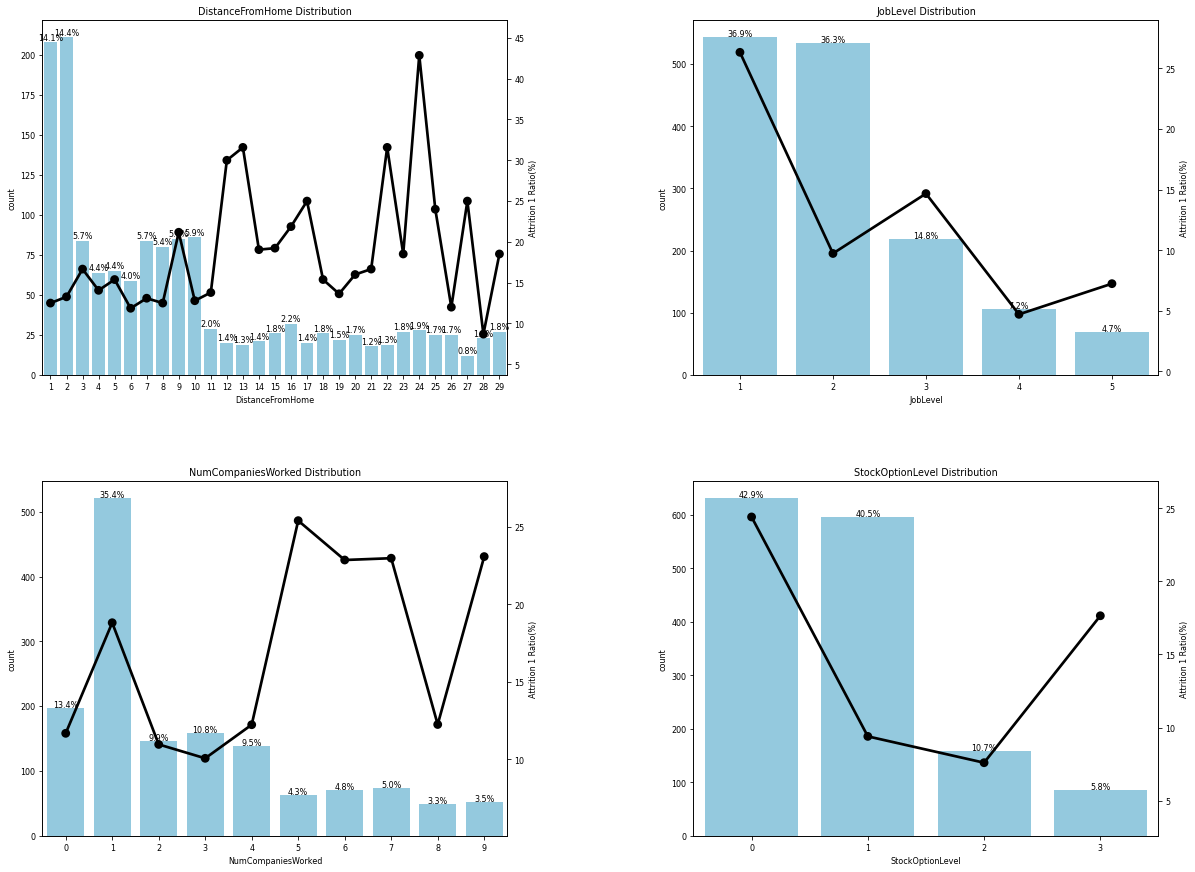

In [ ]:
list_features = ['DistanceFromHome', 'JobLevel', 'NumCompaniesWorked', 'StockOptionLevel'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, list_features, num_rows=2, num_cols=2)

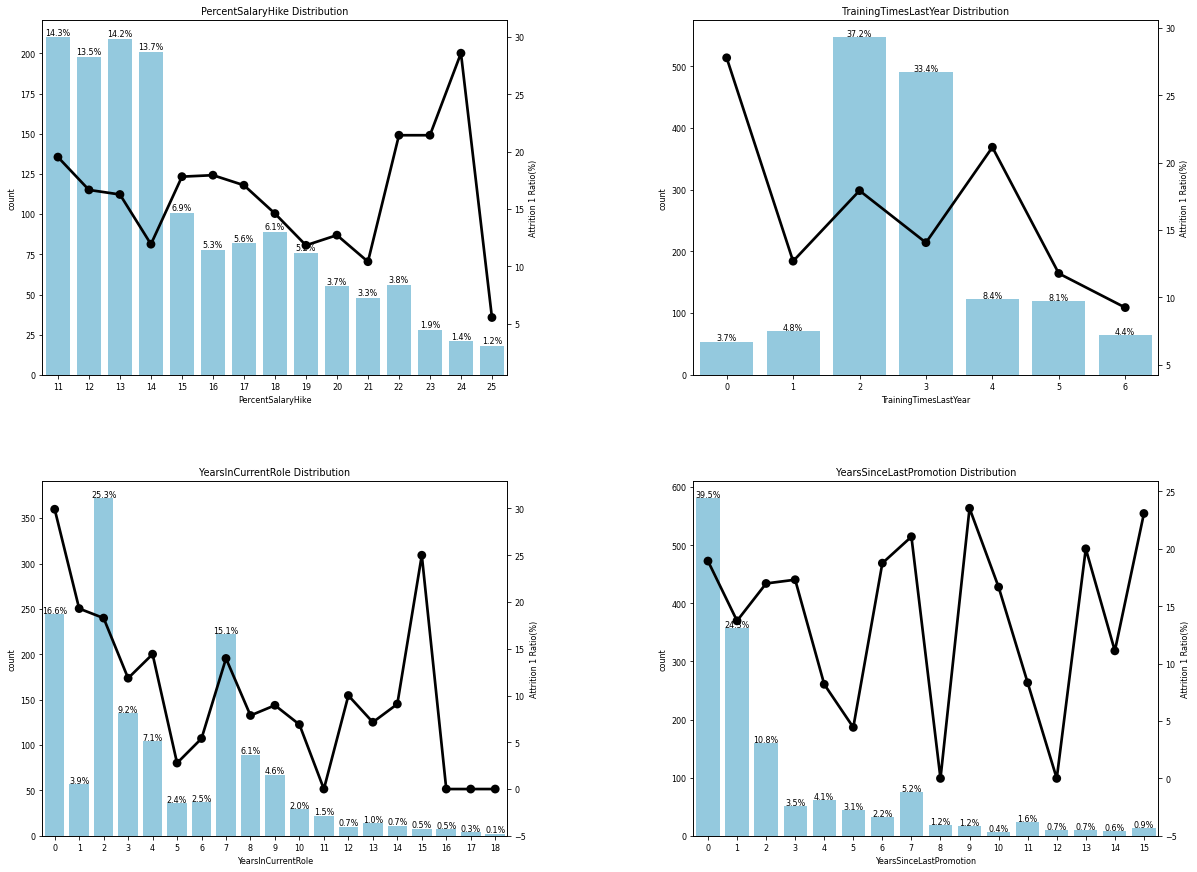

In [ ]:
list_features = ['PercentSalaryHike',  'TrainingTimesLastYear', 'YearsInCurrentRole','YearsSinceLastPromotion'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, list_features, num_rows=2, num_cols=2)

> (2,1) 그래프 16년 ~ 18년의 0% 처리

> (2,2) 그래프 8년, 12년의 0% 처리

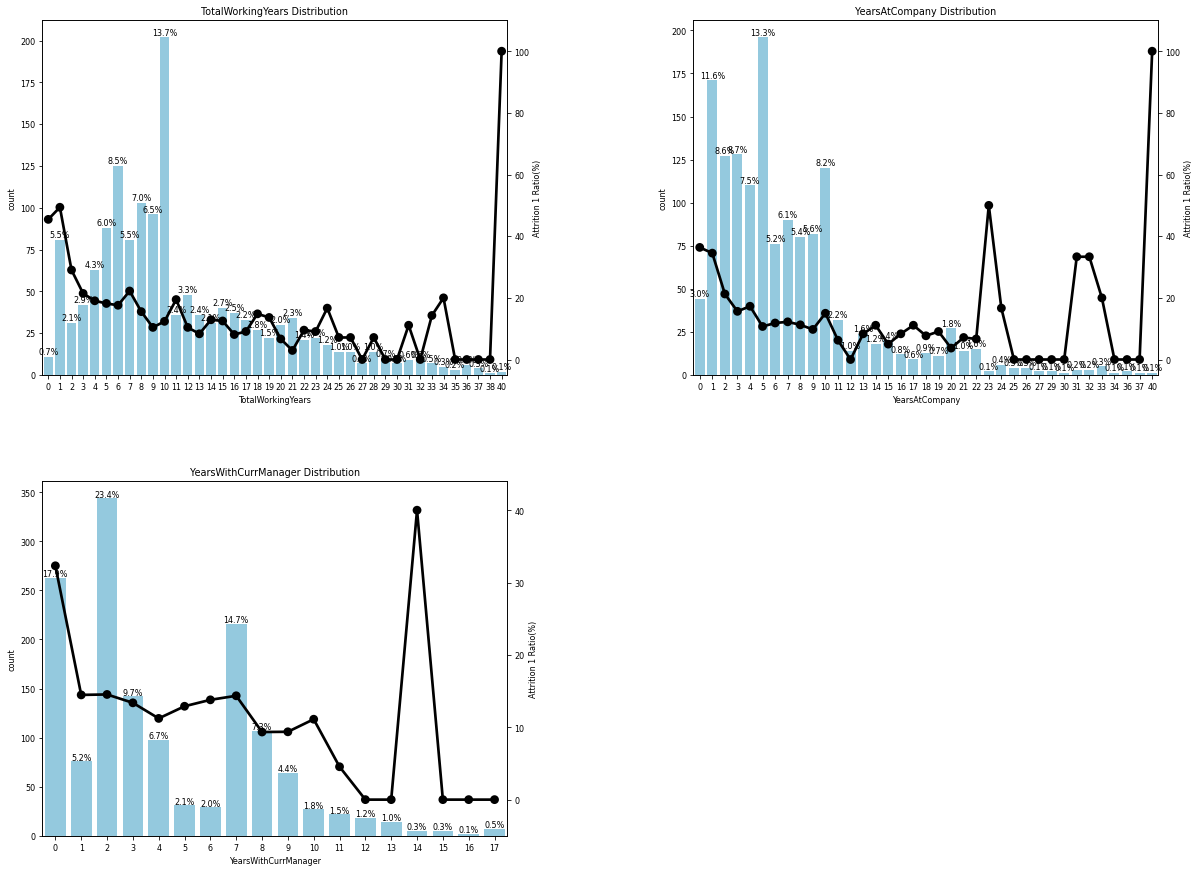

In [ ]:
list_features = ['TotalWorkingYears', 'YearsAtCompany','YearsWithCurrManager'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, list_features, num_rows=2, num_cols=2)

> (1,1) 그래프의 27년 이후의 0%, 100% 값 처리

> (1,2) 그래프의 25년 이후의 0%, 100% 값 처리

> (2,1) 그래프의 12년 이후의 0%, 100% 값 처리

* 0% 100% 값 처리 방법 : 그룹화

### 연속형 피처

In [ ]:
train = train.drop(['PerformanceRating','EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis  = 1)

In [ ]:
train.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


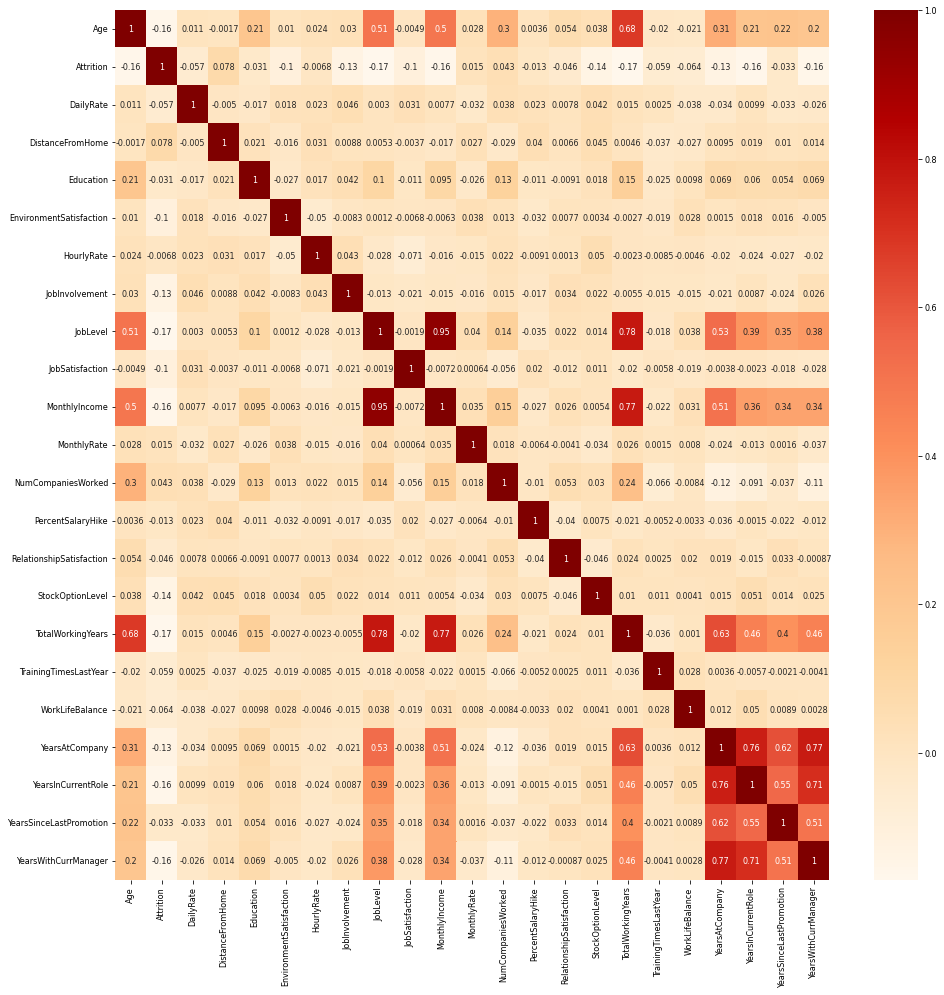

In [ ]:
plt.figure(figsize=(16, 16))
cont_corr = train.corr()     # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기

> 상관계수가 강한 피처에 대한 제거 (고려해볼 만한 요소)

> 0.8 이상의 '아주 강한' 상관관계를 보이는 피처는 제거 고려해보는 것도 좋은 방법

* JobLevel - MonthlyIncome (0.95)
* TotalWorkingYears - JobLevel (0.78)
* TotalWorkingYears - MonthlyIncome (0.77)
* YearsWithCurrManager - YearsAtCompany (0.77)
* YearsInCurrentRole - YearsAtCompany (0.76)
* YearsInCurrentRole - YearsWithCurrManager (0.71)

### 피쳐 스케일링 (Min - Max 정규화 / 표준화)

* Min - Max 정규화
* 피처의 값을 0 ~ 1로 조정하는 기법
* 조정 후 최소값은 0, 최대값은 1이 된다.

> 이상치가 너무 크거나 작을 땐 Min - Max 정규화가 좋지 않은 결과를 낼 수 있다. 이땐 표준화가 더 바람직하다.

* 표준화
* 평균이 0 분산이 1이 되도록 피처 값을 조정하는 기법
* 상한과 하한이 없음

> 표준화를 통해 이상치를 파악 Z-Score를 통해 이상치 제거(2 : 95%, 3 : 99.7%) 이후 Min-Max로 정규화 진행




In [ ]:
# 정규화
# from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
# scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
# scaler.fit(train)
# train_scaled = scaler.transform(train)

In [ ]:
# 표준화
# from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
# scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환.
# fit( ) 과 transform( ) 호출.  
# scaler.fit(train)
# train_scaled = scaler.transform(train)

> 주성분 분석 : 분산을 극대화 해서 성분에 관심이 있기 떄문 표준화 선호

> 군집 분석 : 거리 측도를 기반으로 피처간의 유사성 비교 하기 때문 표준화 선호

> 이미지 프로세싱 : 화소에 따라 범위를 RGB내에 맞추는 경우 정규화 선호

### 인사이트 도출

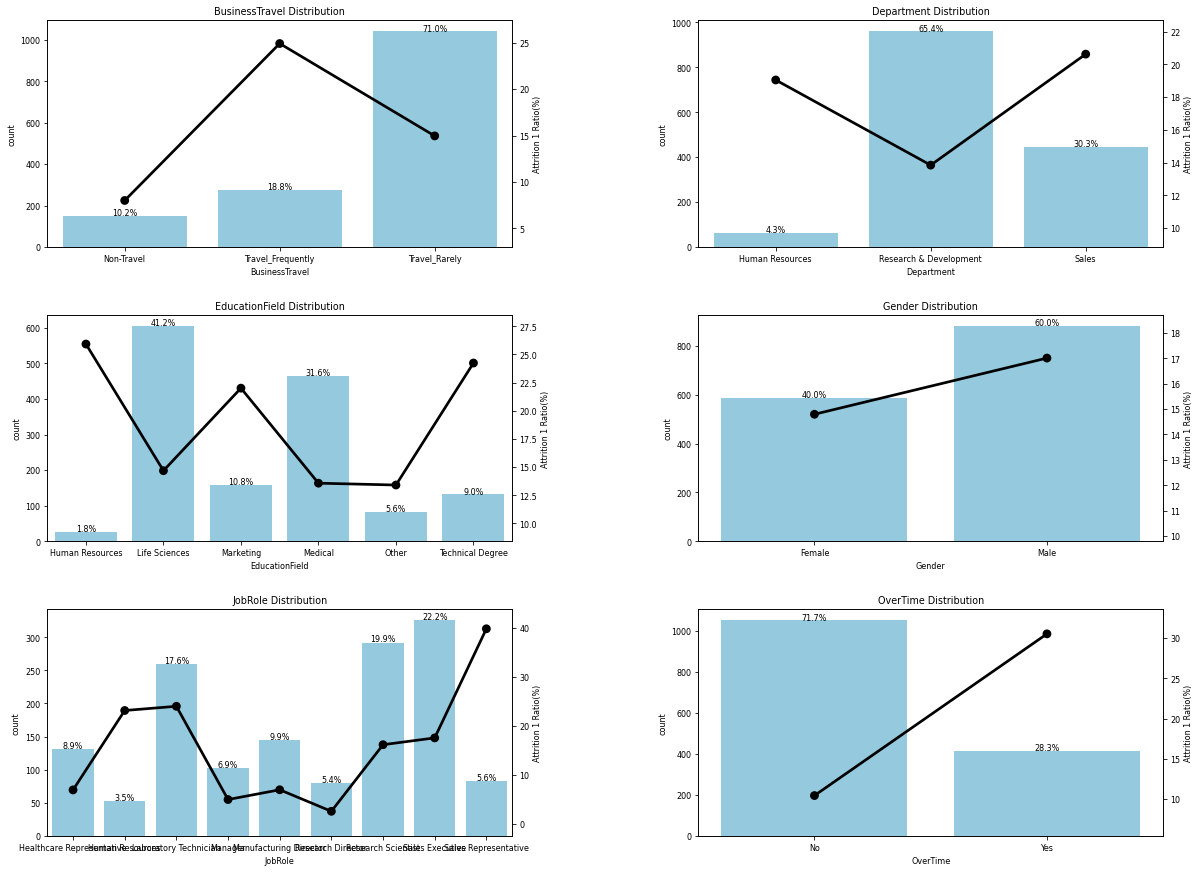

* (1,1) 그래프
  * 출장이 많을수록 이직의 비율이 높다
* (1,2) 그래프
  * 부서 중 R&D 85% 이상이지만 3개의 부서중 이직의 비율이 가장 낮다
* (2,1) 그래프
  * 교육 분야 생명과학, 메디털 분야의 비율이 높지만 이직의 비율이 낮은편에 속한다.
* (2,2) 그래프
  * 남성 60%, 여성 40% 비율이며 이직의 비율은 남성이 조금 더 높다.
* (3,1) 그래프
  * Sales Executive, Research Scientist 비율이 높으며, Sales Representative의 이직비율이 높다.
* (3,2) 그래프
  * 야근의 비율이 없는 것이 높으며, 이직의 비율은 낮다.

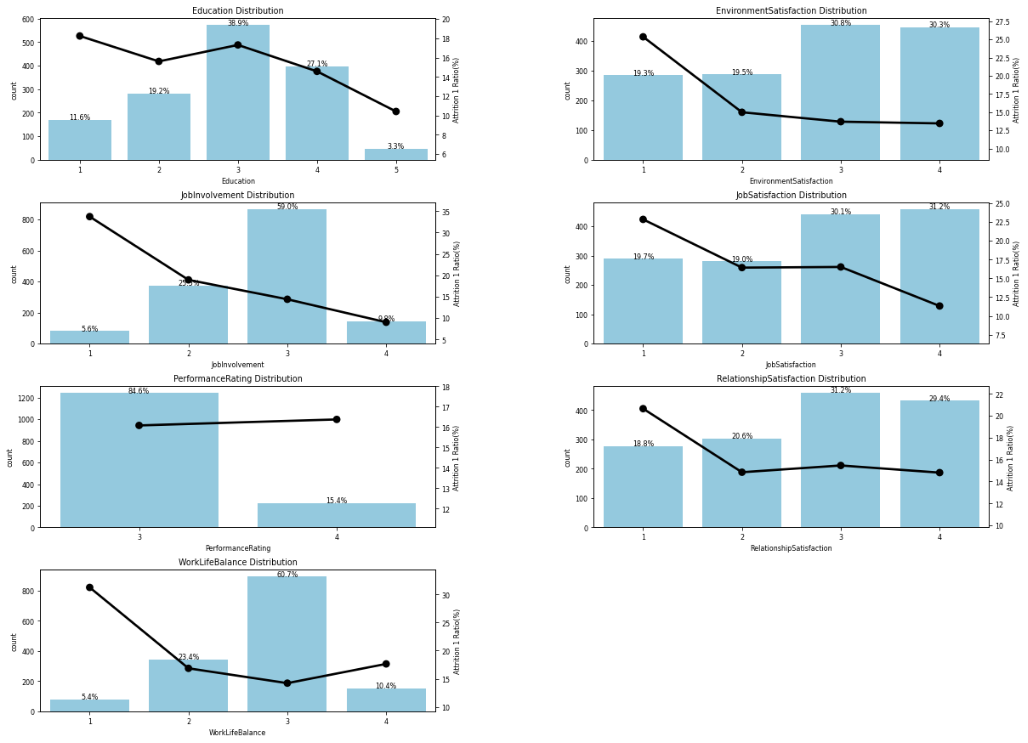

* (1,1) 그래프 
  * 교육 범위는 학사와 석사의 비율이 높으며 이직의 비율은 학력이 높을수록 낮아지는 것을 파악할 수 있다.
* (1,2) 그래프
  * 환경적요인은 좋을수록 이직의 비율이 낮아진다.
* (2,1) 그래프
  * 직업관련도은 높을수록 이직의 비율이 낮아진다.
* (2,2) 그래프
  * 직업만족도는 높을수록 이직의 비율이 낮아진다.
* (3,1) 그래프 
* (3,2) 그래프
  * 관계만족도 높을수록 이직의 비율이 낮아진다.
* (4,1) 그래프
  * 워라벨은 Better가 가장 많지만 비율은 가장 낮은 것을 파악할 수 있다.


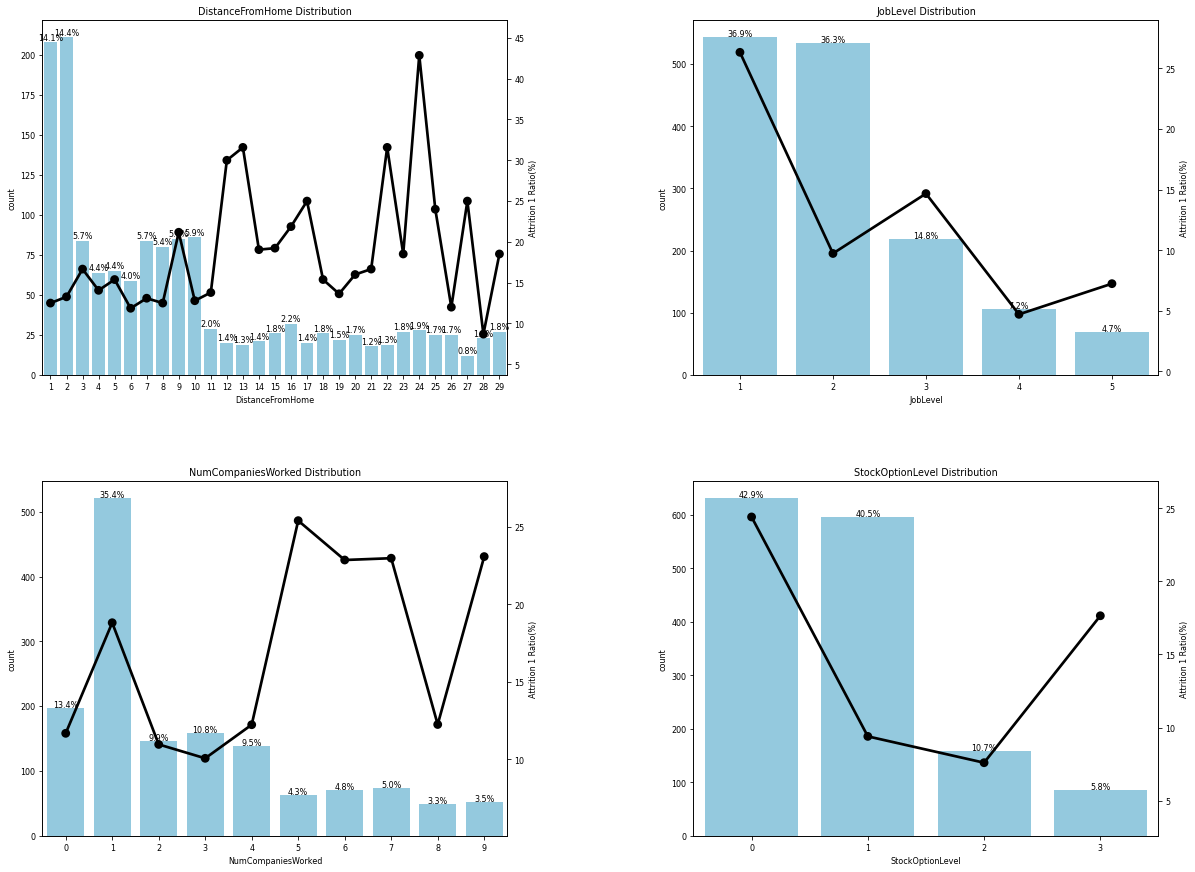

* (1,1) 그래프
  * 자택과의 거리가 가까운 비율이 높으며 멀수록 이직의 비율이 높아 지는 것을 파악할 수 있다.
* (1,2) 그래프
  * 직업의 난이도가 1인 경우 이직의 비율이 높은 것을 파악할 수 있다.
* (2,1) 그래프
  * 일한 회사의 개수가 많을 수록 이직의 비율이 높은 것을 파악 할 수 있다.
* (2,2) 그래프
  * 스톡옵션의 비율이 0인 비율이 높으며 이직의 비율도 높은 것을 파악 할 수 있다.